### Plotting PTMs in Comet and PEAKS results using python for *Prochlococcus* MED4 benchmark study

Starting with:

    Peaks de novo results (.csv) of PTM-optimized sequencing
    Comet results from PTM-optimized database searches

Goal:

    Figures comparing the modifcation type and extent in database and de novo peptides
    
Using:

    - pandas
    - matplotlib

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [99]:
# read in csvs made in MED4-PeaksDB and MED4-Comet notebooks
# bringing in Comet > XCorr 3 and de novo peptides > 50% ALC

peaks50 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDN/RAL95_MED2_trypsin_combine_PTMopt_DN50_totals.csv")
peaks80 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDN/RAL95_MED2_trypsin_combine_PTMopt_DN80_totals.csv")
comet25 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL95_MED2_trypsin_combine_Comet25_totals.csv")
comet3 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL95_MED2_trypsin_combine_Comet3_totals.csv")

frames = [peaks50, peaks80, comet25, comet3]
index = ['peaks50', 'peaks80', 'comet2.5', 'comet3']

# concatenate dataframes
tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
tot = tot.loc[:, ~tot.columns.str.contains('^Unnamed')]

# reindex with peaks and comet
names = ['peaks50', 'peaks80', 'comet2.5', 'comet3']
tot.insert(loc=0, column='data source', value=names)
tot.set_index('data source')

# separate out the dataframe into AAs and %PTMs, too
AA = tot[['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']].copy()
# no C since it's the same #ptm = tot[['% C w/ carb.', '% M w/ oxid', '% N w/ deam', '% Q w/ deam', '% K w/ iron', '% K w/ meth', '% R w/ meth']].copy()
ptm = tot[['% M w/ oxid', '% N w/ deam', '% Q w/ deam', '% K w/ iron', '% K w/ meth', '% R w/ meth']].copy()

[Text(0, 0, 'Peaks 50 % ALC'),
 Text(0, 0, 'Peaks 80% ALC'),
 Text(0, 0, 'Comet > XCorr 2.5'),
 Text(0, 0, 'Comet > XCorr 3')]

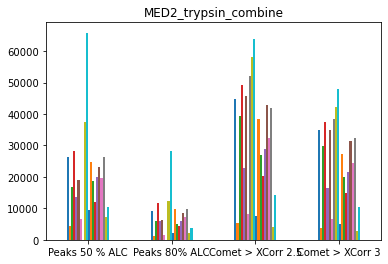

In [100]:
# bar plot of residue totals
# there is no isoleucine (I) in Peaks data, which is why L is really big and I is 0


x_labels = ['Peaks 50 % ALC', 'Peaks 80% ALC', 'Comet > XCorr 2.5', 'Comet > XCorr 3']


ax = AA.plot(kind="bar", title = 'MED2_trypsin_combine')
plt.xticks(rotation=0)
ax.get_legend().remove()
ax.set_xticklabels(x_labels)

Text(0, 0.5, 'fraction of relevent residues with mod.')

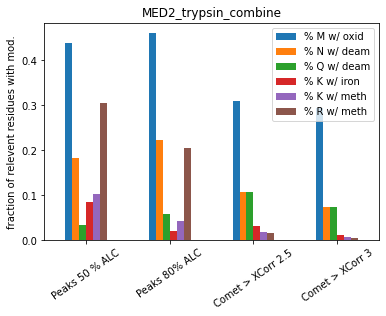

In [105]:
# bar plot of relative modifications

x_labels = ['Peaks 50 % ALC', 'Peaks 80% ALC', 'Comet > XCorr 2.5', 'Comet > XCorr 3']


ax = ptm.plot(kind="bar", title = 'MED2_trypsin_combine')
plt.xticks(rotation=35)
#ax.get_legend().remove()
ax.set_xticklabels(x_labels)
ax.set_ylabel('fraction of relevent residues with mod.')

In [102]:
AA.style.background_gradient(cmap ='viridis')

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,26298,4530,16675,28228,13678,18885,6541,0,37569,65861,9507,24640,18561,11951,20005,23104,19571,26416,7191,10343
1,9215,1086,5896,11615,5900,6195,1413,0,12292,28230,2218,9742,5148,4403,6067,8673,7111,9828,2111,3911
2,44906,5271,39296,49238,22760,45755,8080,52085,58223,63935,7456,38309,26885,20204,28876,42764,32247,41913,3973,14277
3,34766,3876,29841,37360,16417,34864,6466,38307,42186,47856,5032,27263,19908,14923,21484,31555,24319,32305,2714,10384


In [103]:
ptm.style.background_gradient(cmap ='viridis')

,% M w/ oxid,% N w/ deam,% Q w/ deam,% K w/ iron,% K w/ meth,% R w/ meth
0,0.437152,0.181737,0.032968,0.084032,0.103463,0.303774
1,0.460325,0.221823,0.057234,0.019525,0.042467,0.203890
2,0.308879,0.106737,0.105920,0.030641,0.018996,0.016276
3,0.293919,0.072883,0.074650,0.011189,0.005855,0.005027


In [ ]:
# make the AA dataframe contain relative AA compositions for each dataset

